# Research Notebook
## Zachary Doucet
## Date: 17 February 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

- Compute the metric function for a single fluid dark star.
- Met with other students in groups and discussed our TOV solvers.

## Motivation:

Since the last research journal, we have been given individual projects. mine is to determine the redshift inside a dark star through the metric function and potential energy. This will allow us to determine the frequency detectable from an accreting dark star when we all finish our individuals projects. This built off the TOV equation solver which we discussed to make more efficient using C instead of python and using the same script to avoid compatibility issues.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

In order to compute the metric function of a dark star, I used the following formulas found in Glendenning's book [1] which are as follows:

$\frac{d\nu}{dr} = \frac{1}{p + \epsilon} \frac{dp}{dr}$

where $\frac{dp}{dr}$ is obtained using the TOV solver as it returns this, p is the pressure, and $\epsilon$ is the energy density. I integrate this using scipy.integrate.solve_ivp to obtain $\nu(r)$. From here I compute $g_{00}$ as follows

$g_{00}=e^{2\nu}$

I then plot $g_{00}$ as a function of the radius. This was done in the following python script

# Imports
import numpy as np

import matplotlib.pyplot as plt

import scipy as sp

import scipy.integrate as integ

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Define constants

# Constants

m_b = 1 # GeV, boson mass

l = 1 # Coupling strength

e_0 = l * m_b**4 # GeV^4, initial energy density

G = 1.19e-19 # GeV, Gravitational constant

c = 1 # Speed of light

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Define equations

def TOV(r, y):

    """
    Herre I have removed the c from the equations as it is 1.
    """
    
    p, m = y
    
    if p <= 0: # Stop integration if pressure drops below zero
    
        return [0, 0]

    e = e_0*(p/e_0)**0.5 + 3*p # EOS
    
    dp_dr = (-G/(r**2))*(e + p)*(4*np.pi*(r**3)*p)*(1 - (2*G*m)/r)**-1
    
    dm_dr = 4*np.pi*(r**2)*e
    
    return [dp_dr, dm_dr]
    

def Glendenning(r, y):

    p, m, v = y # Extract p, m, and v from y
    
    e = e_0 * (p / e_0)**0.5 + 3 * p # EOS
    
    dp_dr, dm_dr = TOV(r, [p, m]) # Extract derivatives from TOV

    dv_dr = - (1 / (p + e)) * dp_dr

    return [dp_dr, dm_dr, dv_dr] # Return all three derivatives
    
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Integrate

r0 = 1e-7 # Initial radius to avoid division by zero

v0 = 0

r_max = 1e11 # Maximum radius

p0 = 1e-8

m0 = 0

y0 = [p0, m0, v0]

rspan = [r0, r_max]

reval = np.linspace(r0, r_max, 100)


solution = integ.solve_ivp(Glendenning, rspan, y0, t_eval = reval)

r = solution.t

p = solution.y[0]

m = solution.y[1]

v = solution.y[2]


g00 = np.exp(2*v)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Plot 

plt.plot(r , g00, label=r"$g_{00}$")

plt.title(r"$g_{00} \ Vs. \ radius$", fontsize=14)

plt.xlabel(r"radius $(GeV^-1)$", fontsize=14)

plt.ylabel(r"$g_{00} (dimensionless)$", fontsize=14)

plt.grid()

plt.legend(fontsize=14)

plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

This was presented at this mornings group meeting. 

Additionally, me and the other two students in my group met online to disucuss our TOV solvers, another student had the idea to write the integration steps of our TOV solvers in C, as he says, this will be 80 times more efficient. we also discussed creating a common code base now that we have all learned how to write the TOV solver so it is consistent throughout the group and there are no compatibility issues. This was brought up and agreed to in the group meeting with the professor.

# 3: So what? (What does it mean?)
## Describe your results

The previously python program outputs the following graph

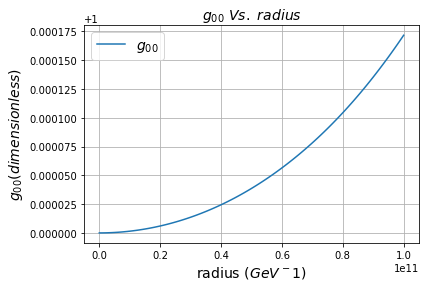

I would say that this week was a success as I successfully computed the metric function allowing me to use this to finish my individual project. Although this portion will not be used in the overall project, in the coming days I will be using this to find the redshift inside the dark star. this result will be shared with the other memebers of the group who are determing the accretion rate and the temperature of the dark star. this will allow us to determine the possible frequency visible from an accreting dark star.

I also think that our student meeting was sucessful as we will be able to work on the code in C to have a consistent TOV solver for our project which will be important when we begin to accumulate our results and finish the project as a whole. The increased efficiency from using C will also be useful when we use this for more complex computations or compute over more points.

# 4. Now what? (What's next?)
## Plan for the next week

Although this week not much was done, I stil achieved the goal I had of computing the metric function and getting a good start on my individual project of computing the redshift due to a dark star. The lack of progress and smaller goal was due to exams. Me and the other students in the group have agreed to spend more time on the project and speak with each other more over reading week as it is a less busy time where we get more done. So in the coming week I intend to finish my individual task and get the redshift due to the dark star and meet with the students of my group to discuss writing the communal TOV solver. I am not sure how exactly to finish my individual project as I will need to find the information in a text book on how to solve for the redshift. but first I will add the Schwarzschild solution for outside the dark star as my metric function is for within the dark star.

# 5. Bibliography

[1]     N. K. Glendenning, Compact Stars: Nuclear Physics, Particle Physics, and General Relativity. Springer, 1997.